
Choose an option:
1. Enter the path to the image
2. Exit

0: 640x640 4 cars, 1 boat, 368.7ms
Speed: 18.3ms preprocess, 368.7ms inference, 29.3ms postprocess per image at shape (1, 3, 640, 640)


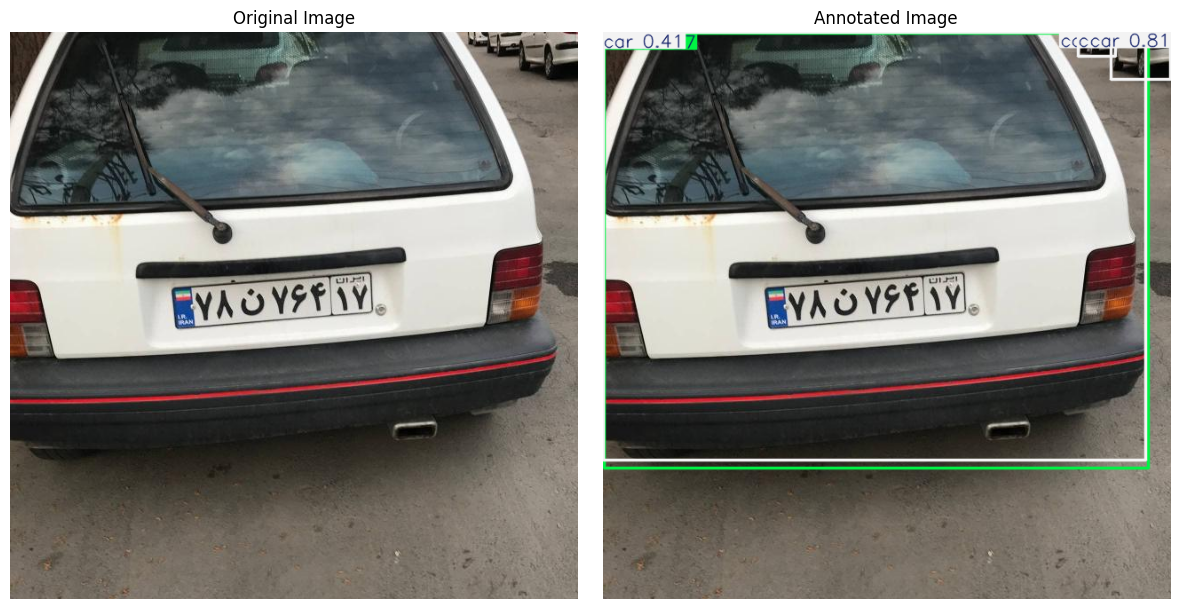


Choose an option:
1. Enter the path to the image
2. Exit
Exiting...


In [2]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Function to display original and annotated images
def display_images(original_image_rgb, annotated_image_rgb, title1="Original Image", title2="Annotated Image"):
    figure, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original_image_rgb)
    axes[0].set_title(title1)
    axes[0].axis('off')

    axes[1].imshow(annotated_image_rgb)
    axes[1].set_title(title2)
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

# Main function
def main():
    model = YOLO('yolov8s.pt')  # Load YOLO model

    while True:
        print("\nChoose an option:")
        print("1. Enter the path to the image")
        print("2. Exit")
        choice = input("Enter your choice (1 or 2): ").strip()

        if choice == '1':
            image_path = input("Enter the path to the image: ").strip()

            try:
                # Read the image
                original_image = cv2.imread(image_path)

                if original_image is None:
                    print(f"Failed to load image: {image_path} (Ensure the path is correct and points to a valid image file)")
                    continue

                # Convert to RGB for display
                original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

                # Run YOLO model
                results = model(original_image)
                result = results[0] if isinstance(results, list) else results

                # Annotate image
                annotated_image = result.plot()
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

                # Display original and annotated images
                display_images(original_image_rgb, annotated_image_rgb)

            except Exception as e:
                print(f"An error occurred: {e}")

        elif choice == '2':
            print("Exiting...")
            break

        else:
            print("Invalid choice. Please enter 1 or 2.")

if __name__ == "__main__":
    main()


In [ ]:
# Code Explanation: Step-by-Step

# 1. Import Required Libraries:
# - `cv2`: Used for reading, manipulating, and displaying images.
# - `matplotlib.pyplot`: For visualizing images in Jupyter notebooks or scripts.
# - `ultralytics.YOLO`: To use the YOLOv8 object detection model.

# 2. `display_images` Function:
# - Accepts two images (`original_image_rgb` and `annotated_image_rgb`) and titles for display.
# - Uses Matplotlib to create a side-by-side plot of the original image and its annotated version.
# - Turns off axis labels for cleaner visuals and uses `tight_layout()` for better spacing.

# 3. `main` Function:
# - **Model Initialization**: 
#   - `model = YOLO('yolov8s.pt')`: Loads the YOLOv8 small pre-trained model (`yolov8s.pt`).
# - **Interactive Menu**:
#   - Provides a choice to process an image (`1`) or exit (`2`).
# - **Reading an Image**:
#   - Uses `cv2.imread()` to load an image from the provided path.
#   - Converts the image to RGB format for compatibility with Matplotlib.
# - **Running YOLO**:
#   - `results = model(original_image)`: Processes the image using the YOLO model.
#   - Extracts the first result from `results` if multiple outputs are present.
# - **Annotating Image**:
#   - `result.plot()`: Annotates the original image with bounding boxes, labels, and scores.
#   - Converts the annotated image back to RGB for consistent visualization.
# - **Display**:
#   - Calls `display_images()` to visualize the original and annotated images side-by-side.
# - Handles errors using `try-except`.

# 4. Interactive Menu Logic:
# - Option `1`: Processes an image as explained above.
# - Option `2`: Exits the loop.
# - Invalid input leads to a prompt to enter valid choices.

---

# Object Detection Using YOLO: Theoretical Explanation

# **YOLO (You Only Look Once)**:
# YOLO is a state-of-the-art object detection algorithm designed to detect multiple objects in real-time. It divides the image into a grid and simultaneously predicts bounding boxes, class probabilities, and confidence scores for each grid cell.

# **Key Concepts in YOLO:**
# 1. **Single Neural Network**:
#    - YOLO applies a single neural network to the entire image, simplifying the process compared to region-based approaches (e.g., Faster R-CNN).
# 2. **Grid System**:
#    - The image is divided into an \( S \times S \) grid.
#    - Each grid cell predicts bounding boxes, confidence scores, and class probabilities.
# 3. **Bounding Boxes**:
#    - A bounding box is defined by \( x, y \) (center coordinates), \( w, h \) (width and height), and \( c \) (confidence).
# 4. **Confidence Score**:
#    - Indicates the likelihood of an object being present and the accuracy of the bounding box.
# 5. **Class Probabilities**:
#    - Probabilities of each class for detected objects.
# 6. **Non-Max Suppression (NMS)**:
#    - Used to remove redundant or overlapping bounding boxes, retaining the one with the highest confidence.

# **Advantages of YOLO**:
# - Real-time performance due to its single-pass architecture.
# - End-to-end training, optimizing both localization and classification simultaneously.

---

# Using YOLO with Custom Datasets (e.g., Number Plate Detection)

# 1. **Dataset Preparation**:
#    - Collect images and annotate them using tools like LabelImg or Roboflow.
#    - Save annotations in the YOLO format (bounding box coordinates in normalized values).

# 2. **Directory Structure**:
#    - Organize dataset into subfolders for images and labels (train, val, test).

# 3. **`data.yaml` File**:
#    - Specifies dataset paths and class names.
#    ```yaml
#    train: dataset/images/train
#    val: dataset/images/val
#    test: dataset/images/test
#    nc: 1  # Number of classes
#    names: ['number_plate']
#    ```

# 4. **Training the Model**:
#    - Use the YOLO CLI or Python API:
#      ```bash
#      yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=50 imgsz=640
#      ```
#    - Customize hyperparameters like epochs, image size, etc.

# 5. **Inference**:
#    - Test the trained model:
#      ```bash
#      yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=your_image.jpg
#      ```

---

# Practical Exam: Questions and Answers

# 1. **Q: What is the purpose of the `cv2.cvtColor` function?**
#    - **A**: It converts an image from one color space to another. In this code, it's used to convert images from BGR (default OpenCV format) to RGB for display using Matplotlib.

# 2. **Q: What does the `model(original_image)` line do?**
#    - **A**: It runs the YOLO model on the input image to detect objects, returning a `results` object containing detected bounding boxes, class labels, and confidence scores.

# 3. **Q: How does YOLO differ from traditional object detection methods like Faster R-CNN?**
#    - **A**: YOLO uses a single neural network for both localization and classification in a single pass, making it faster than region-based methods like Faster R-CNN, which require multiple stages.

# 4. **Q: How do you handle overfitting when training YOLO on a custom dataset?**
#    - **A**: Use techniques like data augmentation, early stopping, dropout, and a validation dataset to monitor performance.

# 5. **Q: What is the function of `result.plot()` in YOLO?**
#    - **A**: It generates an annotated version of the input image, overlaying bounding boxes, class labels, and confidence scores.

# 6. **Q: What is the role of the `.yaml` file in YOLO training?**
#    - **A**: It specifies the dataset paths, number of classes, and class names, providing essential configuration for the training process.
